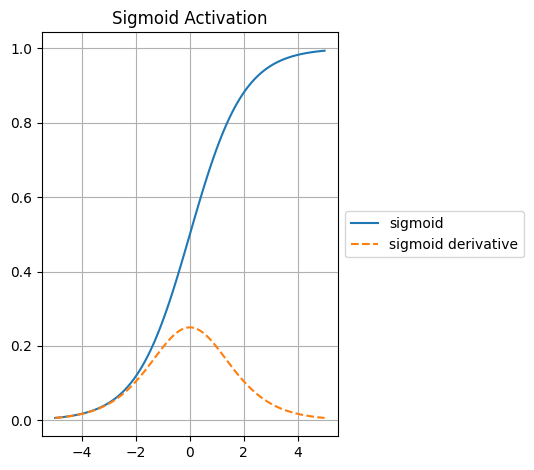

In [2]:
import numpy as np
import matplotlib.pyplot as plt

a = np.linspace(-5, 5, 100)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    s = sigmoid(z)
    return s * (1 - s)

plt.subplot(1, 1, 1)
plt.plot(a, sigmoid(a), label='sigmoid')
plt.plot(a, sigmoid_derivative(a), label='sigmoid derivative', linestyle='--')

plt.title('Sigmoid Activation')
plt.grid(True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

Tanh


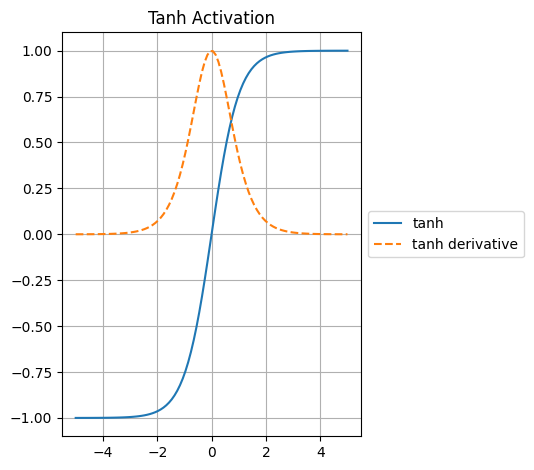

In [3]:
import numpy as np
import matplotlib.pyplot as plt

a = np.linspace(-5, 5, 100)

def tanh(z):
    return np.tanh(z)

def tanh_derivative(z):
    s = tanh(z)
    return 1 - s**2

plt.subplot(1, 1, 1)
plt.plot(a, tanh(a), label='tanh')
plt.plot(a, tanh_derivative(a), label='tanh derivative', linestyle='--')

plt.title('Tanh Activation')
plt.grid(True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

RELU


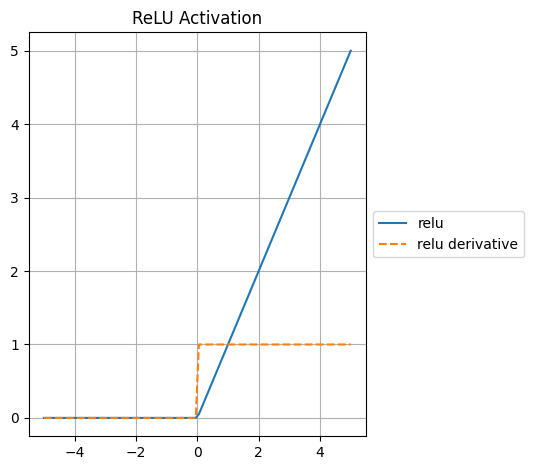

In [4]:
import numpy as np
import matplotlib.pyplot as plt

a = np.linspace(-5, 5, 100)

def relu(z):
    return np.maximum(0, z)

def relu_derivative(z):
    return (z > 0).astype(float)

plt.subplot(1, 1, 1)
plt.plot(a, relu(a), label='relu')
plt.plot(a, relu_derivative(a), label='relu derivative', linestyle='--')

plt.title('ReLU Activation')
plt.grid(True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

LEAKY RELU

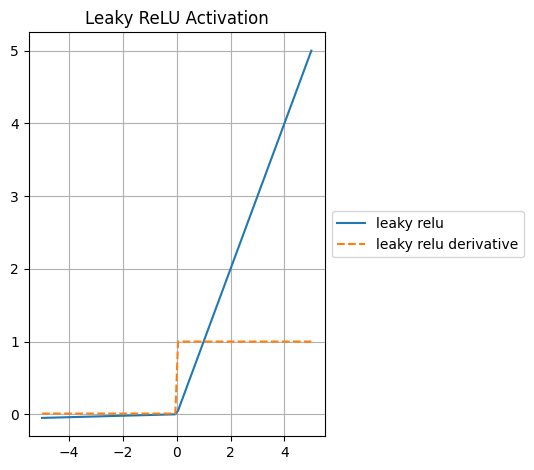

In [6]:
import numpy as np
import matplotlib.pyplot as plt

a = np.linspace(-5, 5, 100)
alpha = 0.01

def leaky_relu(z, alpha=0.01):
    return np.where(z > 0, z, z * alpha)

def leaky_relu_derivative(z, alpha=0.01):
    return np.where(z > 0, 1, alpha)

plt.subplot(1, 1, 1)
plt.plot(a, leaky_relu(a, alpha), label='leaky relu')
plt.plot(a, leaky_relu_derivative(a, alpha), label='leaky relu derivative', linestyle='--')

plt.title('Leaky ReLU Activation')
plt.grid(True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

ELU


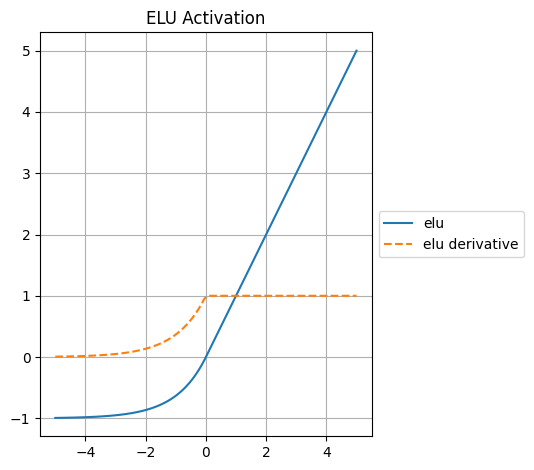

In [5]:
import numpy as np
import matplotlib.pyplot as plt

a = np.linspace(-5, 5, 100)
alpha = 1.0

def elu(z, alpha=1.0):
    return np.where(z > 0, z, alpha * (np.exp(z) - 1))

def elu_derivative(z, alpha=1.0):
    return np.where(z > 0, 1, alpha * np.exp(z))

plt.subplot(1, 1, 1)
plt.plot(a, elu(a, alpha), label='elu')
plt.plot(a, elu_derivative(a, alpha), label='elu derivative', linestyle='--')

plt.title('ELU Activation')
plt.grid(True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

Softmax

In [7]:
import numpy as np

def softmax(z):
    """Computes softmax for a vector z."""

    e_z = np.exp(z - np.max(z))
    return e_z / e_z.sum()


scores = np.array([3.0, 1.0, 0.2])
probabilities = softmax(scores)

print(f"Input scores: {scores}")
print(f"Output probabilities: {probabilities}")
print(f"Sum of probabilities: {np.sum(probabilities):.1f}")

Input scores: [3.  1.  0.2]
Output probabilities: [0.8360188  0.11314284 0.05083836]
Sum of probabilities: 1.0


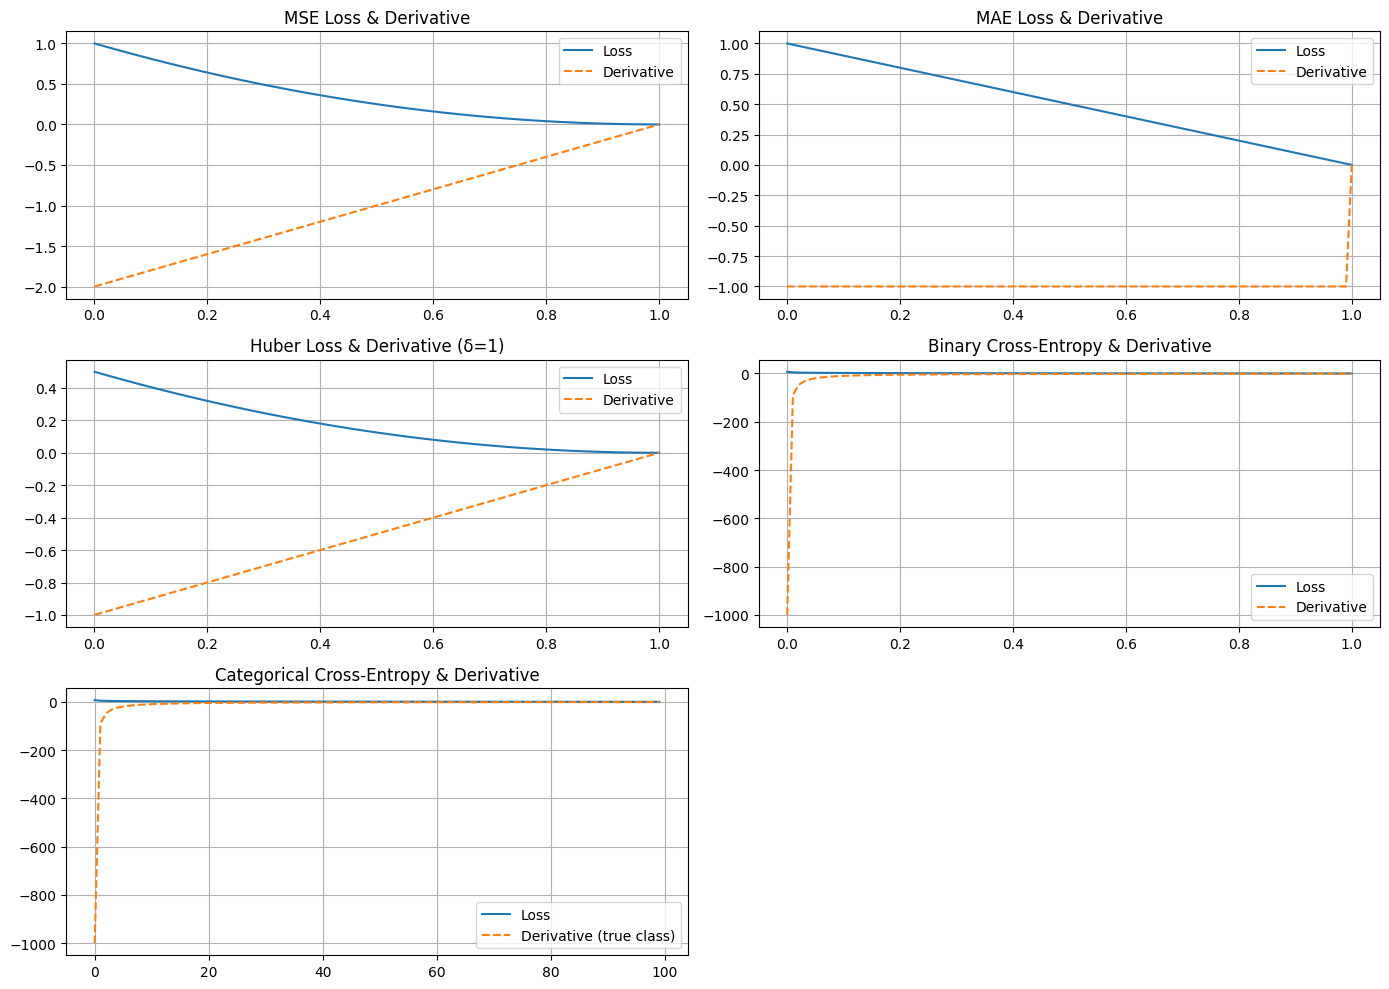

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# === Loss functions ===
def mse(y_true, y_pred):
    return (y_true - y_pred) ** 2

def mae(y_true, y_pred):
    return np.abs(y_true - y_pred)

def huber(y_true, y_pred, delta=1.0):
    error = y_true - y_pred
    is_small_error = np.abs(error) <= delta
    squared_loss = 0.5 * error**2
    linear_loss = delta * (np.abs(error) - 0.5 * delta)
    return np.where(is_small_error, squared_loss, linear_loss)

def binary_cross_entropy(y_true, y_pred, eps=1e-15):
    y_pred = np.clip(y_pred, eps, 1 - eps)
    return -(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

def categorical_cross_entropy(y_true, y_pred, eps=1e-15):
    y_pred = np.clip(y_pred, eps, 1 - eps)
    return -np.sum(y_true * np.log(y_pred), axis=-1)

# === Derivatives ===
def mse_derivative(y_true, y_pred):
    return 2 * (y_pred - y_true)

def mae_derivative(y_true, y_pred):
    return np.sign(y_pred - y_true)

def huber_derivative(y_true, y_pred, delta=1.0):
    error = y_pred - y_true
    return np.where(np.abs(error) <= delta, error, delta * np.sign(error))

def binary_cross_entropy_derivative(y_true, y_pred, eps=1e-15):
    y_pred = np.clip(y_pred, eps, 1 - eps)
    return -(y_true / y_pred) + ((1 - y_true) / (1 - y_pred))

def categorical_cross_entropy_derivative(y_true, y_pred, eps=1e-15):
    y_pred = np.clip(y_pred, eps, 1 - eps)
    return -y_true / y_pred

# === Sample data ===
y_true = np.array([1.0])
y_pred = np.linspace(0.001, 1, 100)

plt.figure(figsize=(14, 10))

# MSE + derivative
plt.subplot(3, 2, 1)
plt.plot(y_pred, mse(y_true, y_pred), label="Loss")
plt.plot(y_pred, mse_derivative(y_true, y_pred), '--', label="Derivative")
plt.title("MSE Loss & Derivative")
plt.legend()
plt.grid(True)

# MAE + derivative
plt.subplot(3, 2, 2)
plt.plot(y_pred, mae(y_true, y_pred), label="Loss")
plt.plot(y_pred, mae_derivative(y_true, y_pred), '--', label="Derivative")
plt.title("MAE Loss & Derivative")
plt.legend()
plt.grid(True)

# Huber + derivative
plt.subplot(3, 2, 3)
plt.plot(y_pred, huber(y_true, y_pred, delta=1.0), label="Loss")
plt.plot(y_pred, huber_derivative(y_true, y_pred, delta=1.0), '--', label="Derivative")
plt.title("Huber Loss & Derivative (δ=1)")
plt.legend()
plt.grid(True)

# Binary Cross-Entropy + derivative
plt.subplot(3, 2, 4)
plt.plot(y_pred, binary_cross_entropy(y_true, y_pred), label="Loss")
plt.plot(y_pred, binary_cross_entropy_derivative(y_true, y_pred), '--', label="Derivative")
plt.title("Binary Cross-Entropy & Derivative")
plt.legend()
plt.grid(True)

# Categorical Cross-Entropy + derivative (3 classes)
y_true_cat = np.array([0, 0, 1])
y_pred_cat = np.vstack([np.linspace(0.001, 0.999, 100),
                        np.linspace(0.999, 0.001, 100),
                        np.linspace(0.001, 0.999, 100)]).T

plt.subplot(3, 2, 5)
plt.plot(np.arange(100), categorical_cross_entropy(y_true_cat, y_pred_cat), label="Loss")
plt.plot(np.arange(100), categorical_cross_entropy_derivative(y_true_cat, y_pred_cat)[:, 2], '--', label="Derivative (true class)")
plt.title("Categorical Cross-Entropy & Derivative")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
